In [ ]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [ ]:
df_NLP = pd.read_csv('/content/drive/MyDrive/WSB/wsb_submissions_NLP_clean.csv')

In [ ]:
df_features = pd.read_csv('/content/drive/MyDrive/WSB/WSB_submissions_with_sentiment.csv',sep=';')

In [ ]:
df_features.head()

,created_utc,author,created_utc.1,id,link_flair_text,num_comments,score,subreddit_subscribers,selftext,title,upvote_ratio,url,title_polarity,title_subjectivity,body_polarity,body_subjectivity,polarity
0,2021-10-19 17:58:57,VendiVendiVendi,2021-10-19 17:58:57,qbh10s,Gain,0,1,10967090,So 13.56 cad for BB. It’s moving and gaining ...,BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...,0.0,0.000000,-0.470378,0.516667,-0.470378
1,2021-10-19 17:57:49,Far_Bass_7284,2021-10-19 17:57:49,qbh04w,News,1,1,10967087,NaN,Surely it is a coincidence.,1.0,https://www.reddit.com/gallery/qbh04w,0.5,0.888889,0.000000,0.000000,0.500000
2,2021-10-19 17:55:24,HistoricalAnimator43,2021-10-19 17:55:24,qbgyco,YOLO,0,1,10967076,NaN,yolo sava options,1.0,https://i.redd.it/a3mzqbu44gu71.png,0.0,0.000000,0.000000,0.000000,0.000000
3,2021-10-19 17:54:51,ZaRaWi,2021-10-19 17:54:51,qbgxy8,YOLO,0,1,10967076,NaN,meme,1.0,https://i.redd.it/ki810mvz3gu71.jpg,0.0,0.000000,0.000000,0.000000,0.000000
4,2021-10-19 17:52:33,CuteInterest1884,2021-10-19 17:52:33,qbgw9u,DD,0,1,10967075,"BB is on the move higher, not because of the p...",BB,1.0,https://www.reddit.com/r/wallstreetbets/commen...,0.0,0.000000,0.168254,0.506349,0.168254


In [ ]:
#get link_flair_text,	num_comments,	score,upvote_ratio
df_NLP = pd.merge(df_NLP,df_features[['id','link_flair_text',	'num_comments',	'score','upvote_ratio']],on='id',how='left')

In [ ]:
df_NLP.head()

,Unnamed: 0,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio
0,0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0
1,1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0
2,2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0
3,3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0
4,4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0


## 2.1 Sentiment Analysis

In [ ]:
df_NLP.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0


In [ ]:
df_NLP['title_lemmatized_str'] = [' '.join(map(str,eval(l))) for l in df_NLP['title_lemmatized']]
df_NLP['selftext_lemmatized_str'] = [' '.join(map(str,eval(l))) for l in df_NLP['selftext_lemmatized']]
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio,title_lemmatized_str,selftext_lemmatized_str
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0,bb,13.56 cad bb move gain traction get ape brain ...
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0,surely coincidence,
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0,yolo sava option,
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0,meme,
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0,bb,bb move higher patent alone come pipeline hold...


In [ ]:
df_NLP['title_sentiment'] = df_NLP['title_lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_NLP['selftext_lsentiment'] = df_NLP['selftext_lemmatized_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_NLP.head()


,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio,title_lemmatized_str,selftext_lemmatized_str,title_sentiment,selftext_lsentiment
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0,bb,13.56 cad bb move gain traction get ape brain ...,0.0,-0.233333
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0,surely coincidence,,0.5,0.000000
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0,yolo sava option,,0.0,0.000000
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0,meme,,0.0,0.000000
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0,bb,bb move higher patent alone come pipeline hold...,0.0,0.168254


In [ ]:
#@todo: comparison between score and sentiment, upvotes and sentiment 

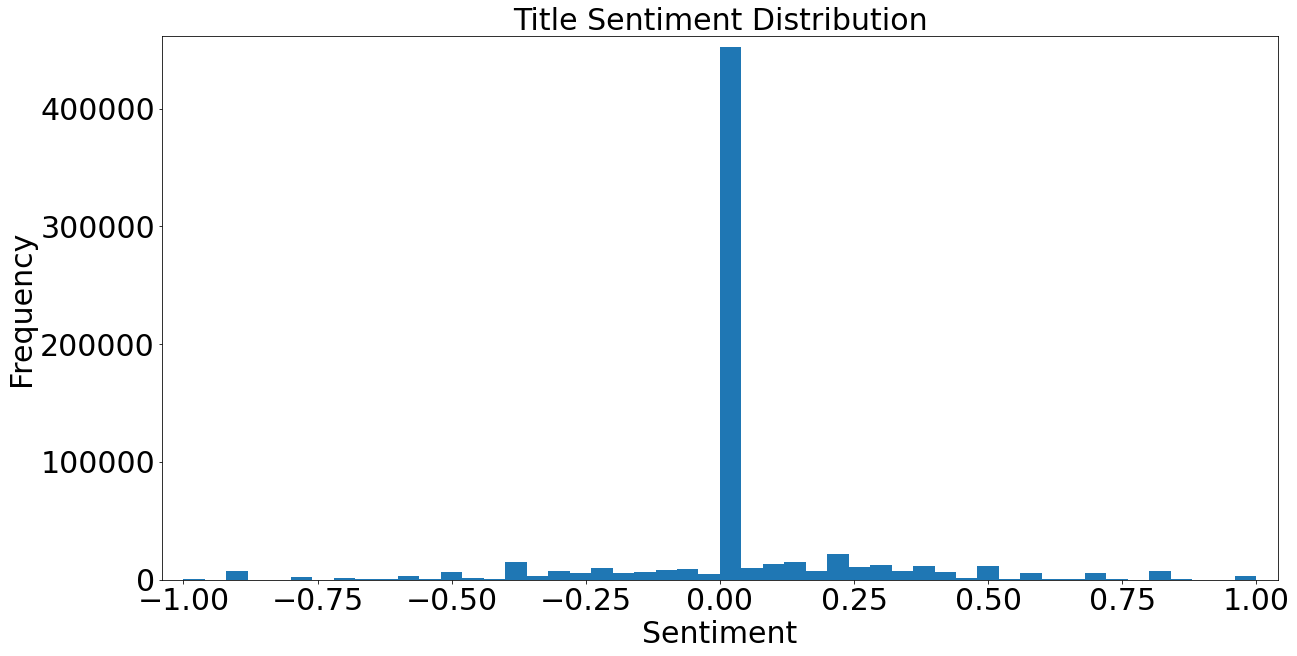

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['title_sentiment'], bins=50)
plt.title('Title Sentiment Distribution', fontsize=30)
plt.show()

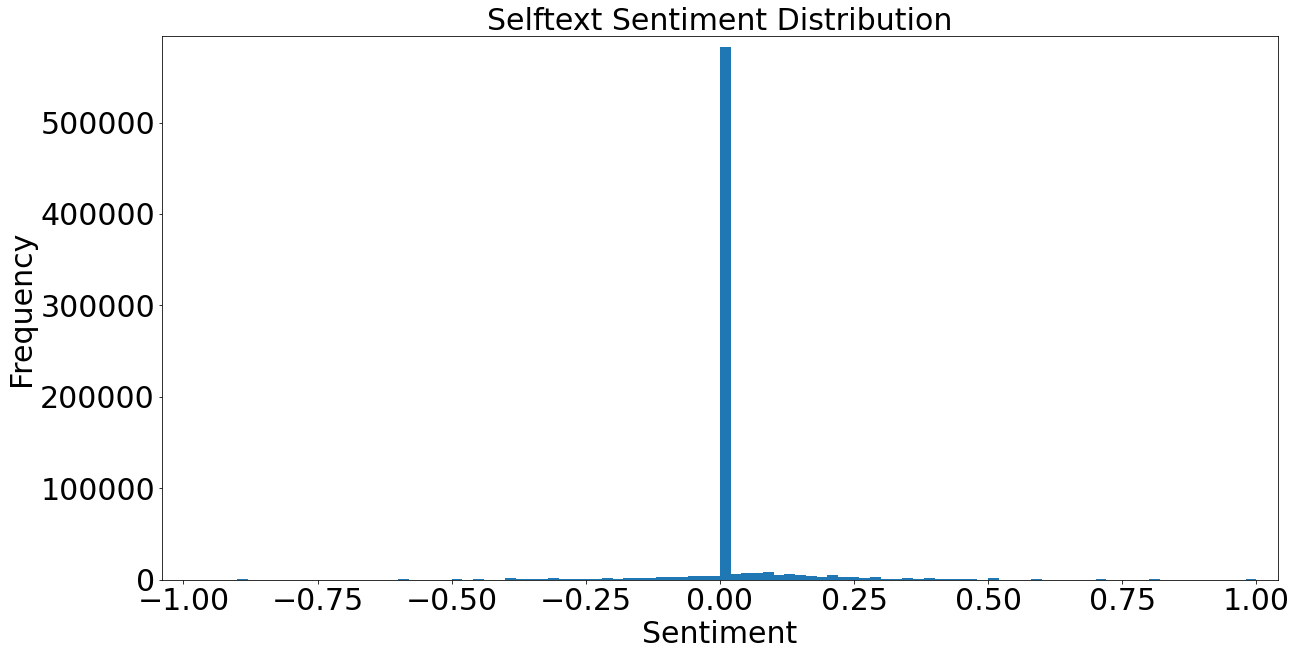

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['selftext_lsentiment'], bins=100)
plt.title('Selftext Sentiment Distribution', fontsize=30)
plt.show()

In [ ]:
#average sentiment by category
#pre vs post hype sentiment comparision

## 2.2 Word count

In [ ]:
df_NLP['word_count_title'] = df_NLP['title_lemmatized'].apply(lambda x: len(str(x).split()))
df_NLP['word_count_selfttext'] = df_NLP['selftext_lemmatized'].apply(lambda x: len(str(x).split()))

In [ ]:
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio,title_lemmatized_str,selftext_lemmatized_str,title_sentiment,selftext_lsentiment,word_count_title,word_count_selfttext
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0,bb,13.56 cad bb move gain traction get ape brain ...,0.0,-0.233333,1,17
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0,surely coincidence,,0.5,0.000000,2,1
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0,yolo sava option,,0.0,0.000000,3,1
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0,meme,,0.0,0.000000,1,1
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0,bb,bb move higher patent alone come pipeline hold...,0.0,0.168254,1,17


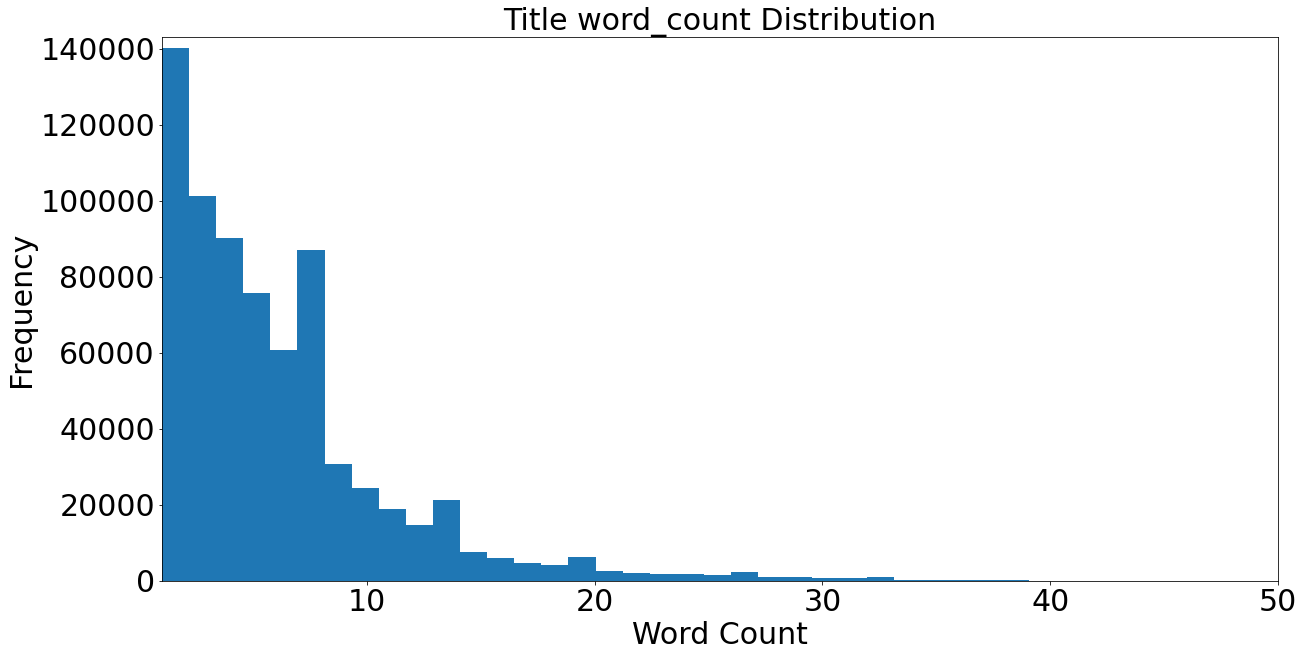

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_title'], bins=100)
plt.xlim(xmin=1, xmax = 50)
plt.title('Title word_count Distribution', fontsize=30)
plt.show()

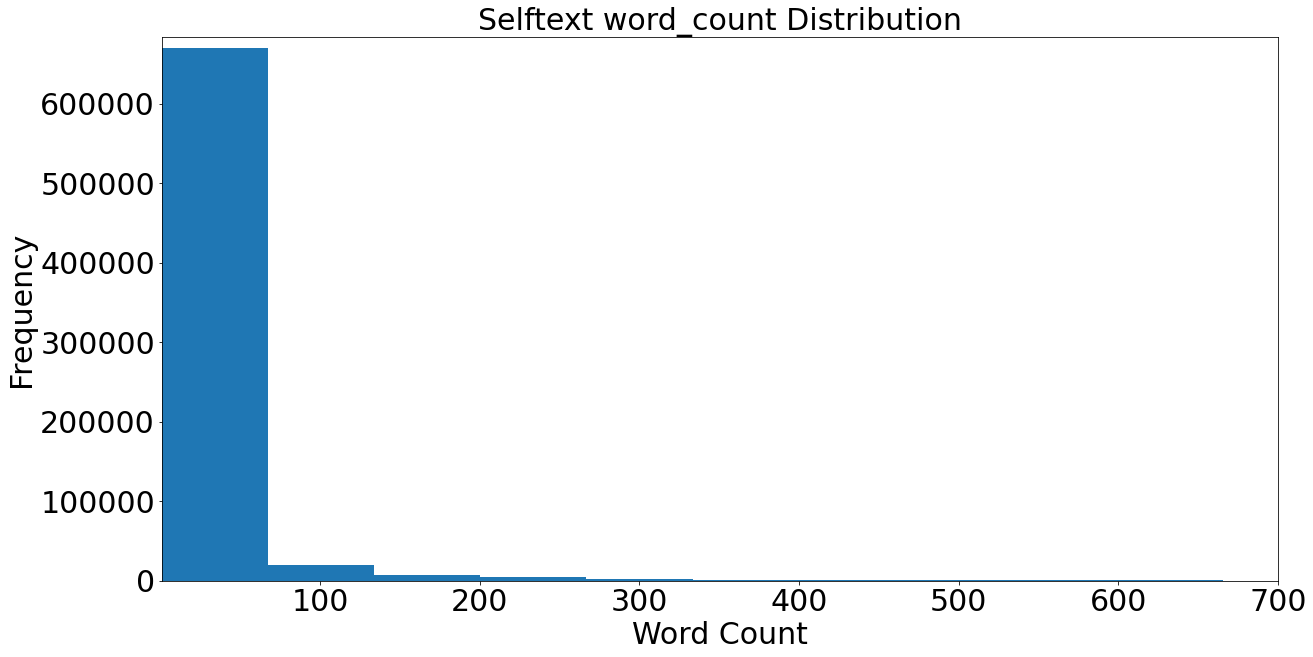

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Word Count', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df_NLP['word_count_selfttext'], bins=100)
plt.xlim(xmin=1, xmax = 700)
plt.title('Selftext word_count Distribution', fontsize=30)
plt.show()

##sentiment by categories

In [ ]:
#sentiment by categories 
df_by_category = df_NLP.groupby("link_flair_text")["title_sentiment"].mean()

In [ ]:
df_by_category

link_flair_text
Announcement                       0.000000
Chart                              0.025772
DD                                 0.032400
Daily Discussion                   0.000000
Discussion                         0.021313
Donation                           0.029176
Earnings Thread                   -0.003333
Forex                              0.084512
Fundamentals                       0.016581
Futures                            0.010291
GME Thread                        -0.200000
Gain                               0.050120
Gods                               0.107143
IT'S ACTUALLY GOOD                 0.000000
Literally 10 minutes long          0.000000
Loss                               0.008005
Megathread                         0.000000
Meme                               0.031674
Mods                               0.015289
Mods - Regarding MrBeast Post      0.000000
Mods - Rule Reminder               0.000000
News                               0.023628
Official        

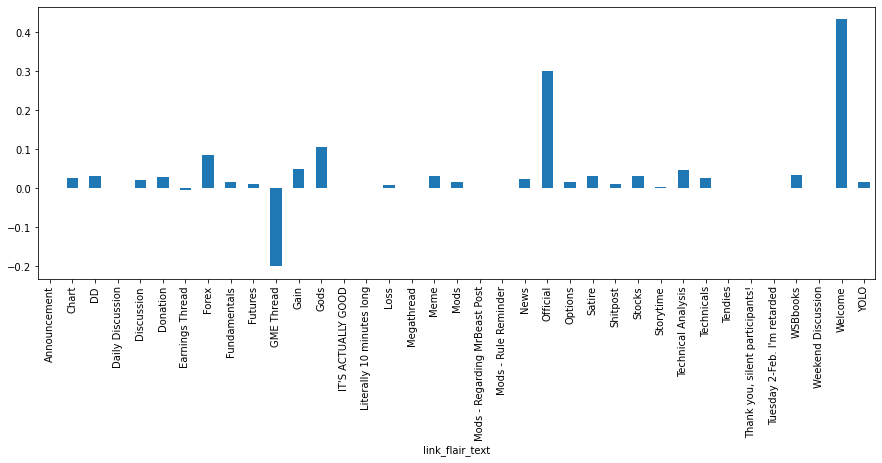

In [ ]:
df_by_category.plot.bar(figsize=(15, 5))

In [ ]:
df_by_category = df_NLP.groupby("link_flair_text")["selftext_lsentiment"].mean()
df_by_category

link_flair_text
Announcement                       0.210179
Chart                              0.001712
DD                                 0.037515
Daily Discussion                   0.512345
Discussion                         0.026417
Donation                           0.004212
Earnings Thread                    0.024490
Forex                              0.046076
Fundamentals                       0.020957
Futures                            0.010373
GME Thread                         0.000000
Gain                               0.009708
Gods                               0.000000
IT'S ACTUALLY GOOD                 0.000000
Literally 10 minutes long          0.100000
Loss                               0.000017
Megathread                         0.000000
Meme                               0.001778
Mods                               0.046736
Mods - Regarding MrBeast Post     -0.060000
Mods - Rule Reminder               0.000000
News                               0.005383
Official        

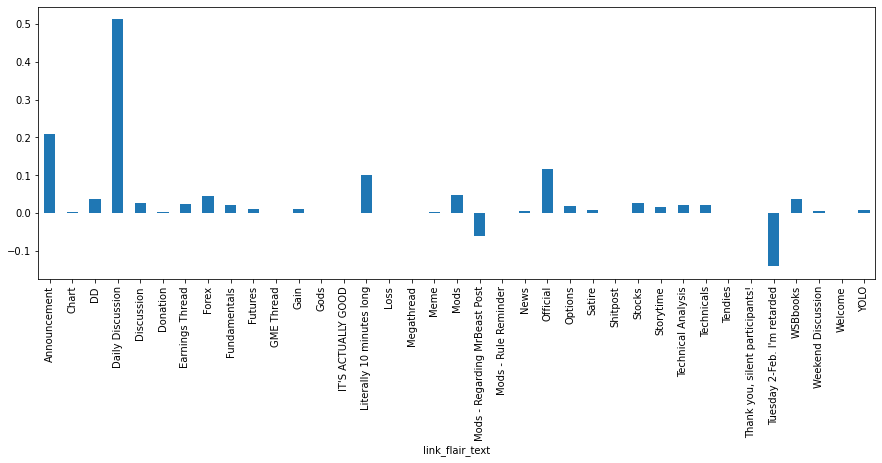

In [ ]:
df_by_category.plot.bar(figsize=(15, 5))

## Word Count by category

In [ ]:
df_by_category = df_NLP.groupby("link_flair_text")["word_count_title"].mean()
df_by_category

link_flair_text
Announcement                        2.000000
Chart                               7.296246
DD                                  6.868130
Daily Discussion                    5.877072
Discussion                          6.391797
Donation                            8.787190
Earnings Thread                     7.575000
Forex                               6.706422
Fundamentals                        6.065149
Futures                             6.161937
GME Thread                          5.000000
Gain                                6.541428
Gods                                9.000000
IT'S ACTUALLY GOOD                 12.000000
Literally 10 minutes long           2.000000
Loss                                6.677783
Megathread                          3.000000
Meme                                5.048175
Mods                                4.931818
Mods - Regarding MrBeast Post       5.000000
Mods - Rule Reminder               10.000000
News                                7.2

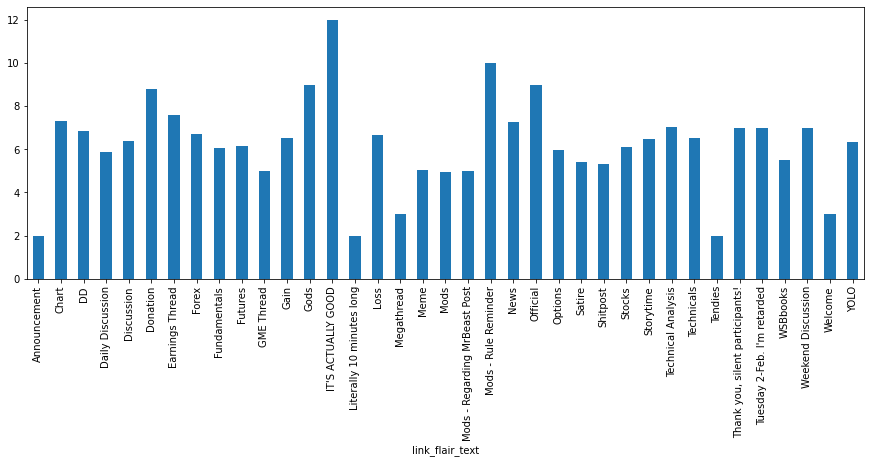

In [ ]:
df_by_category.plot.bar(figsize=(15, 5))

In [ ]:
df_by_category = df_NLP.groupby("link_flair_text")["word_count_selfttext"].mean()
df_by_category

link_flair_text
Announcement                       159.000000
Chart                                3.260697
DD                                 147.639528
Daily Discussion                   198.664365
Discussion                          27.434366
Donation                             2.836777
Earnings Thread                      7.491667
Forex                               20.293578
Fundamentals                        41.427934
Futures                             19.257095
GME Thread                           1.000000
Gain                                 4.338177
Gods                                23.000000
IT'S ACTUALLY GOOD                   1.000000
Literally 10 minutes long           12.000000
Loss                                 3.890769
Megathread                           4.000000
Meme                                 2.163316
Mods                                79.227273
Mods - Regarding MrBeast Post       63.000000
Mods - Rule Reminder                18.000000
News              

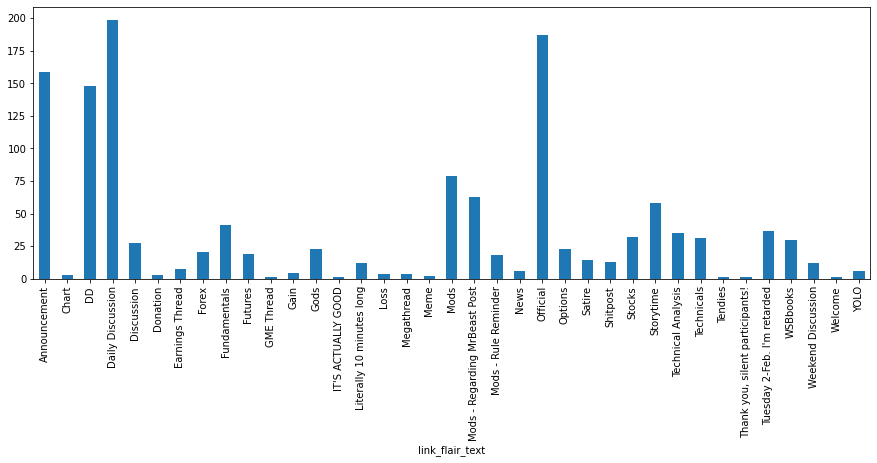

In [ ]:
df_by_category.plot.bar(figsize=(15, 5))

## correlation between category,sentiment,word_count etc

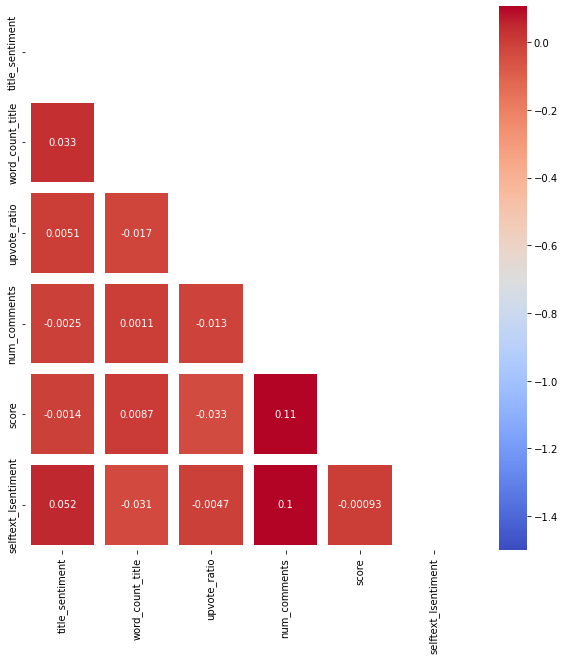

In [ ]:

correlation = df_NLP[['title_sentiment','word_count_title','upvote_ratio','num_comments','score','selftext_lsentiment']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 10}, linewidths=10, vmin=-1.5, mask=mask)

## 2.3 Term Frequency Analysis

In [ ]:
import ast
words =  df_NLP['title_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords[0:50])


['bb', 'surely', 'coincidence', 'yolo', 'sava', 'option', 'meme', 'bb', 'sdig', 'sit', 'ape', 'strong', 'charging', 'bull', 'inspiration', 'prog', 'yolo', '1.5', 'yr', 'menace', 'hedge', 'fund', 'squeeze', 'short', 'hood', '372k', 'gain', 'tsla', 'delivery', 'pre-earnings', 'tpx', 'look', 'one', 'future', 'help', 'bite', 'lol', '😂', 'know', 'something', 'genuis', '💎🤲🏾', 'bb', '🚀🚀🚀🚀🚀', 'serious', 'question', 'try', 'understand', 'amc', 'gme']


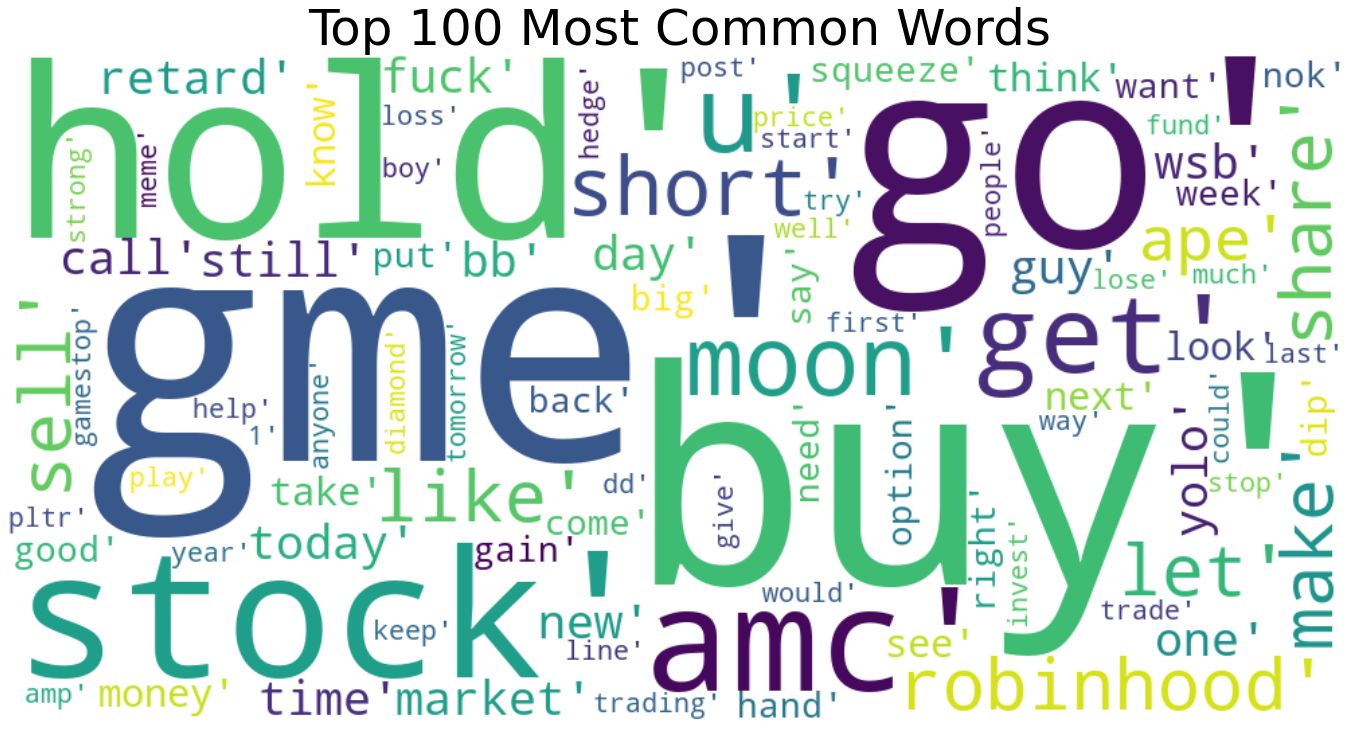

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)


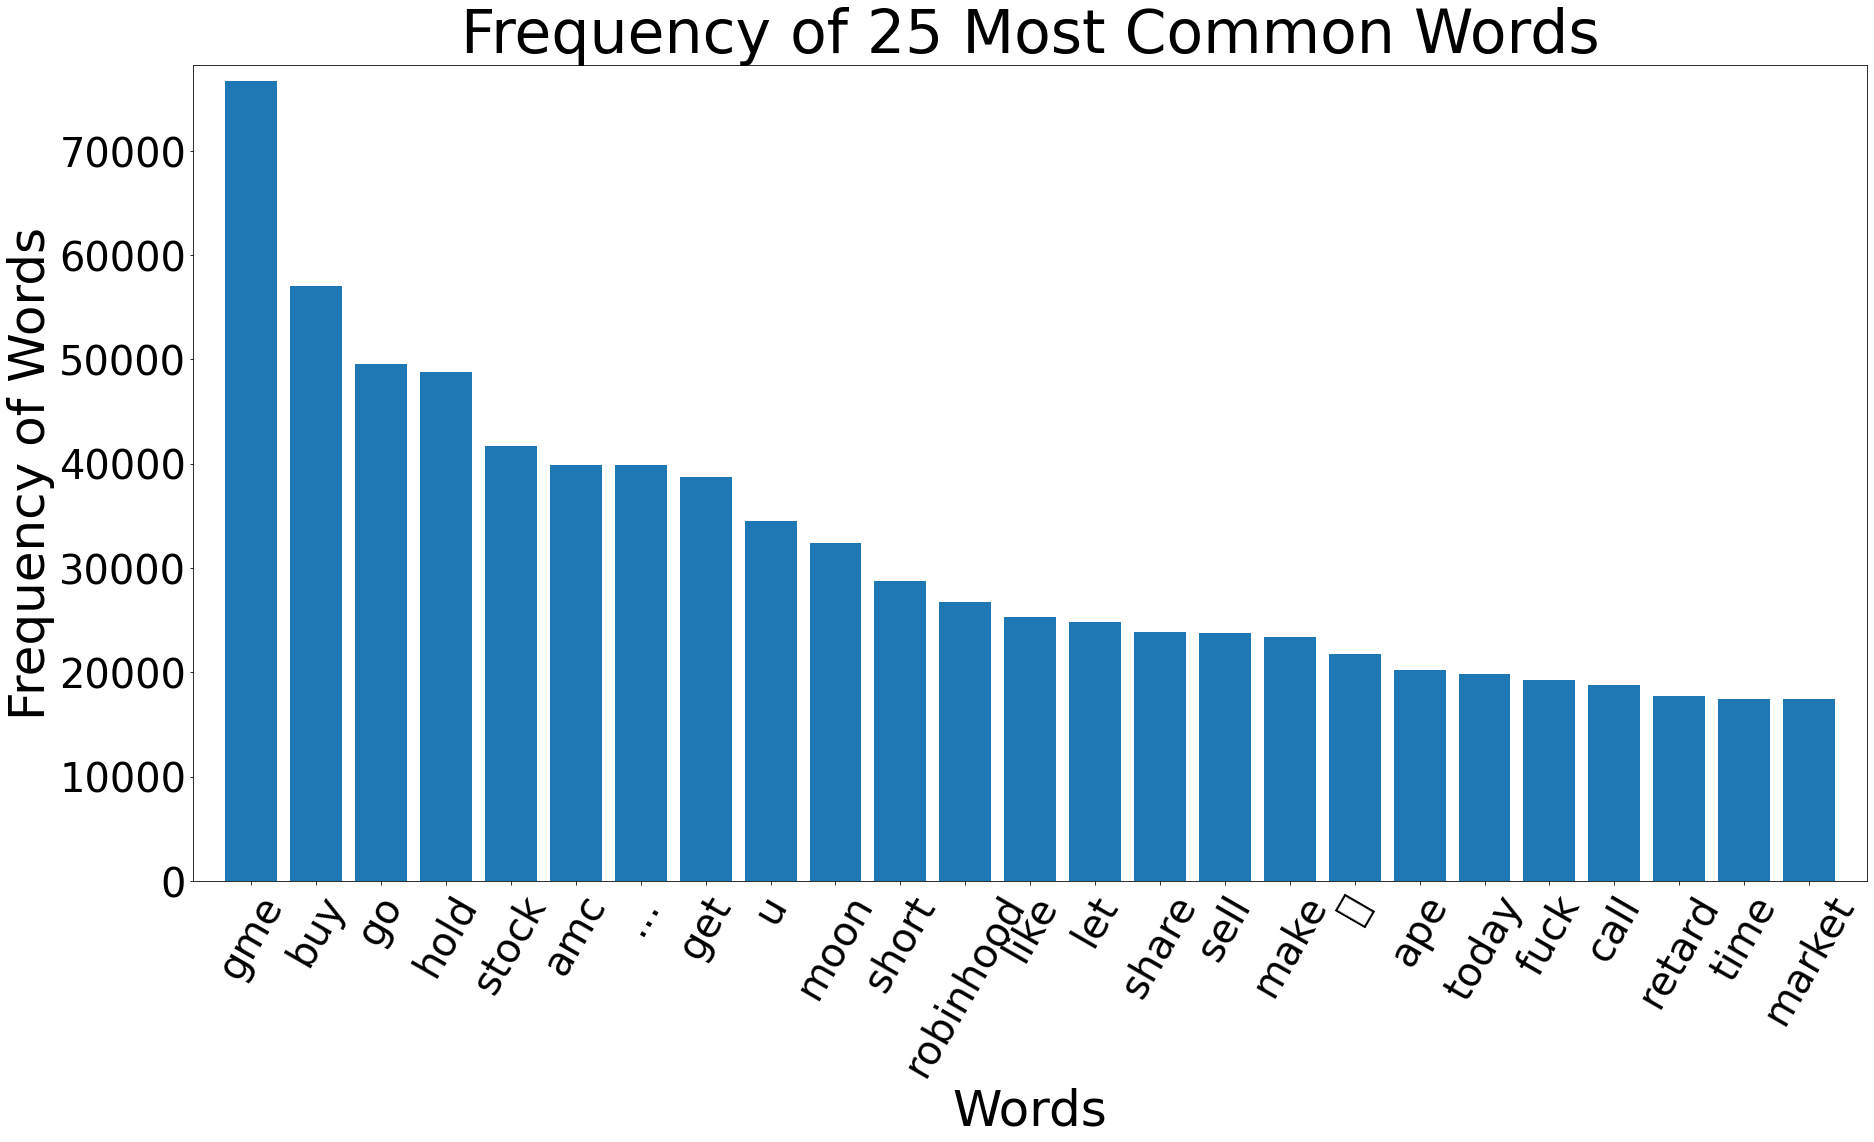

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
words =  df_NLP['selftext_lemmatized'].apply(lambda s: list(ast.literal_eval(s)))
allwords_selftext = []
for wordlist in words:
    allwords_selftext += wordlist
print(allwords_selftext[0:50])

['13.56', 'cad', 'bb', 'move', 'gain', 'traction', 'get', 'ape', 'brain', 'move', 'one', 'late', 'buy', 'black', 'berry', 'make', 'move', 'bb', 'move', 'higher', 'patent', 'alone', 'come', 'pipeline', 'holder', 'stock', 'also', 'strong', 'believer', '1000', 'stock', 'year', 'hold', 'tight', 'nerd', 'long', 'time', 'post', 'come', 'bearing', 'gift', 'knowledge', 'whatever', 'knowledge', '**the', 'knowledge', '**', '**', 'hood**', 'get']


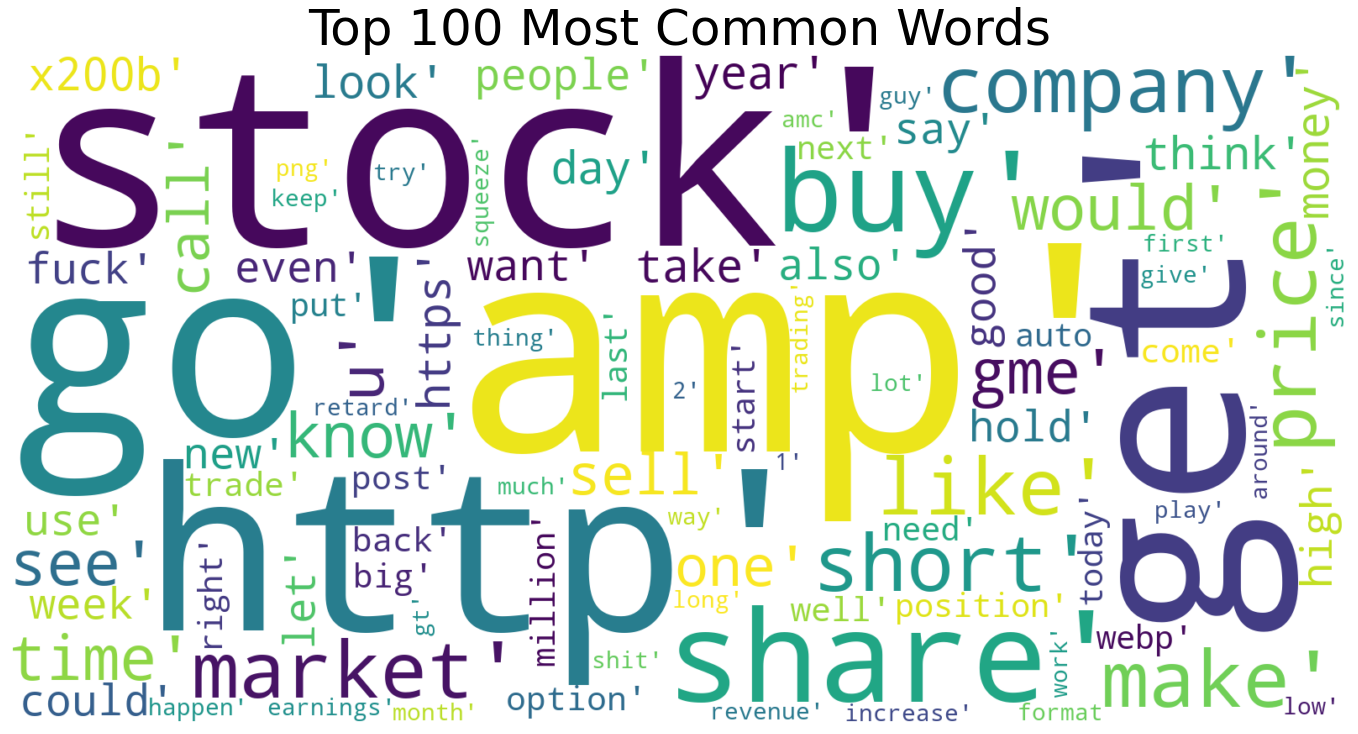

In [ ]:
mostcommon = FreqDist(allwords_selftext).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

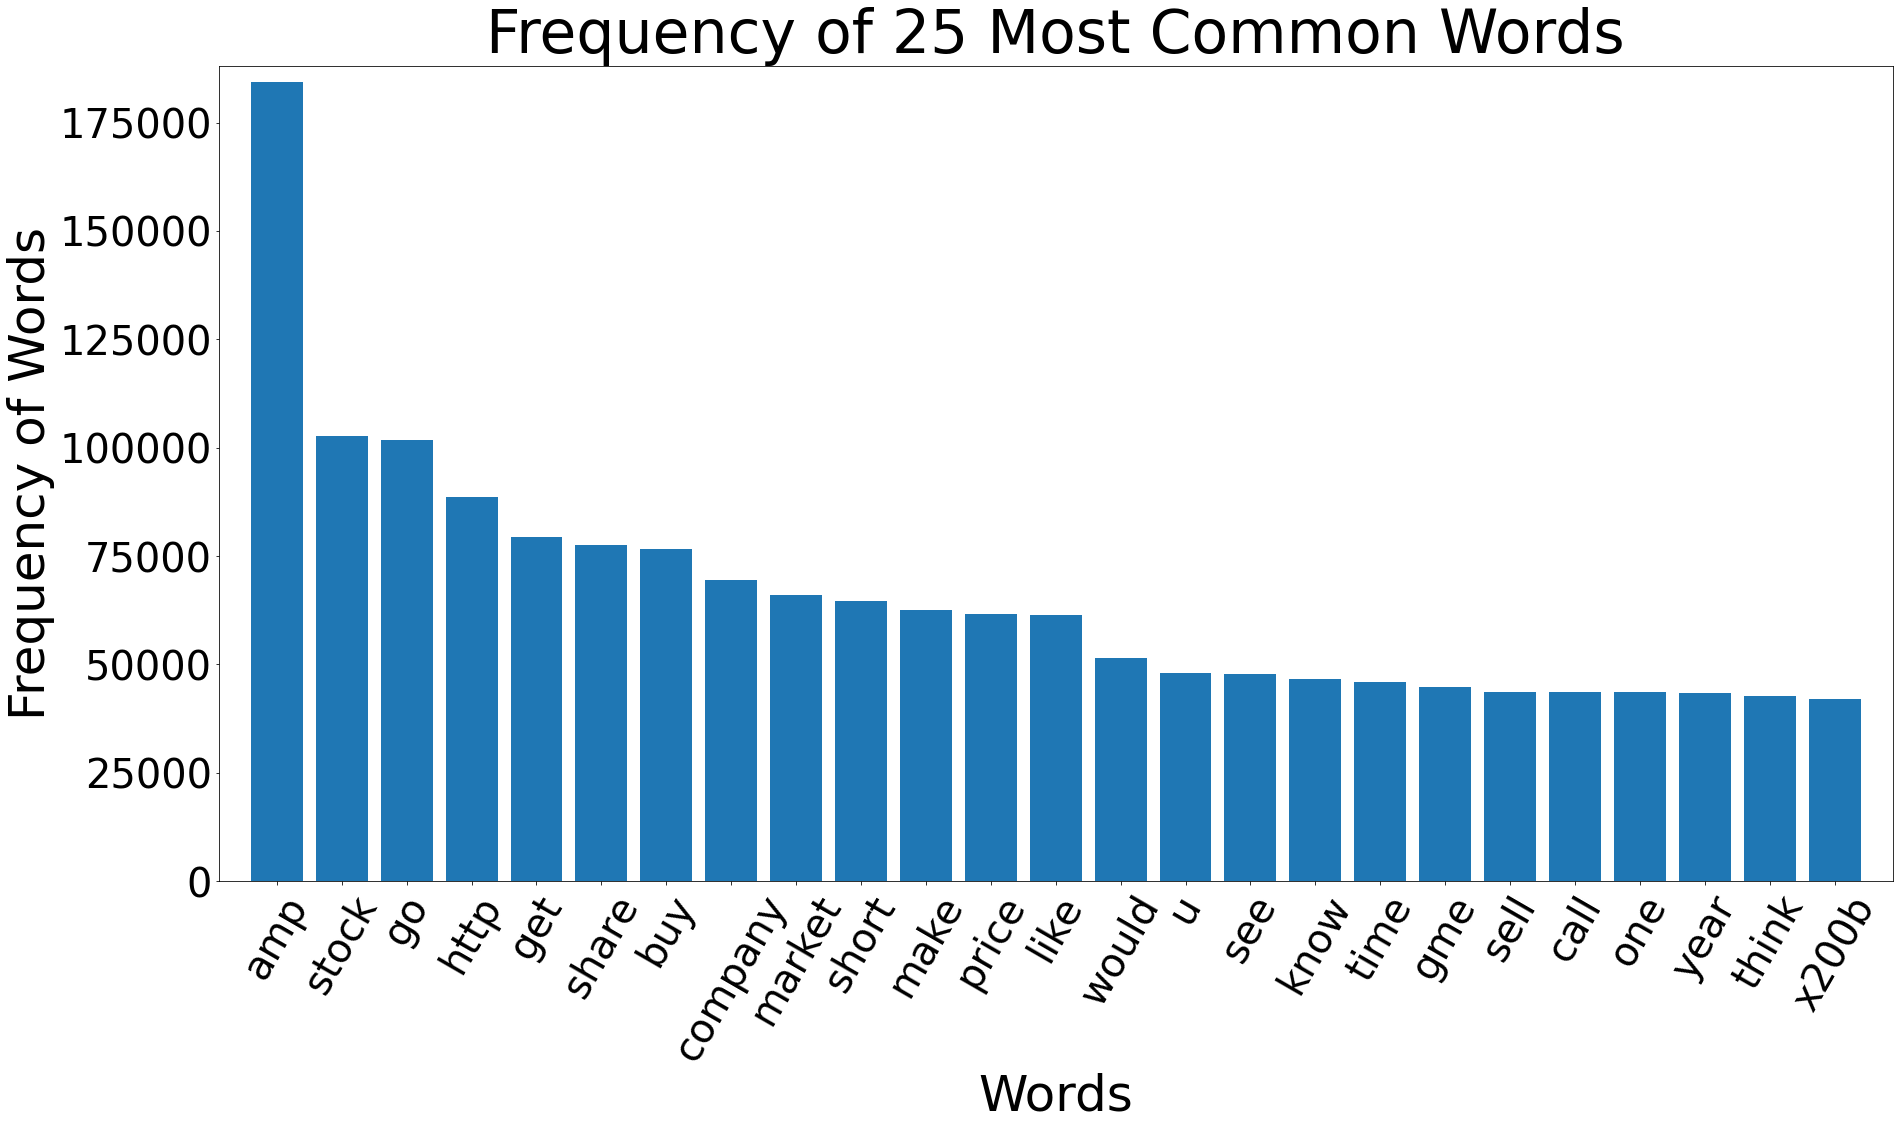

In [ ]:
mostcommon_small = FreqDist(allwords_selftext).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(30,15))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [ ]:
#df_NLP = df_NLP[['created_utc','id',	'title_lemmatized',	'selftext_lemmatized',	'title_sentiment',	'selftext_lsentiment',	'word_count_title',	'word_count_selfttext']]
df_NLP.head()

,created_utc,id,title,selftext,title_lemmatized,selftext_lemmatized,link_flair_text,num_comments,score,upvote_ratio,title_lemmatized_str,selftext_lemmatized_str,title_sentiment,selftext_lsentiment,word_count_title,word_count_selfttext
0,2021-10-19 17:58:57,qbh10s,BB,So 13.56 cad for BB. It’s moving and gaining ...,['bb'],"['13.56', 'cad', 'bb', 'move', 'gain', 'tracti...",Gain,0,1,1.0,bb,13.56 cad bb move gain traction get ape brain ...,0.0,-0.233333,1,17
1,2021-10-19 17:57:49,qbh04w,Surely it is a coincidence.,NaN,"['surely', 'coincidence']",[],News,1,1,1.0,surely coincidence,,0.5,0.000000,2,1
2,2021-10-19 17:55:24,qbgyco,yolo sava options,NaN,"['yolo', 'sava', 'option']",[],YOLO,0,1,1.0,yolo sava option,,0.0,0.000000,3,1
3,2021-10-19 17:54:51,qbgxy8,meme,NaN,['meme'],[],YOLO,0,1,1.0,meme,,0.0,0.000000,1,1
4,2021-10-19 17:52:33,qbgw9u,BB,"BB is on the move higher, not because of the p...",['bb'],"['bb', 'move', 'higher', 'patent', 'alone', 'c...",DD,0,1,1.0,bb,bb move higher patent alone come pipeline hold...,0.0,0.168254,1,17


In [ ]:
df_NLP.index = pd.DatetimeIndex(df_NLP.created_utc)

In [ ]:

#df_daily.index = pd.DatetimeIndex(df_NLP.created_utc)
df_daily_title_sentiment = df_NLP.groupby(pd.Grouper(freq="D"))[["title_sentiment"]].mean()
df_daily_title_wordcount = df_NLP.groupby(pd.Grouper(freq="D"))[["word_count_title"]].mean()

df_daily_selftext_sentiment = df_NLP.groupby(pd.Grouper(freq="D"))[["selftext_lsentiment"]].mean()
df_daily_selftextwordcount = df_NLP.groupby(pd.Grouper(freq="D"))[["word_count_selfttext"]].mean()

df_daily_num_comments = df_NLP.groupby(pd.Grouper(freq="D"))[["num_comments"]].mean()
df_daily_score = df_NLP.groupby(pd.Grouper(freq="D"))[["score"]].mean()

df_daily_upvote_ratio = df_NLP.groupby(pd.Grouper(freq="D"))[["upvote_ratio"]].mean()

#df_daily['upvote_ratio'] = df_NLP.groupby(pd.Grouper(freq="D"))[["link_flair_text"]].count()



In [ ]:
type(df_daily_title_sentiment)

pandas.core.frame.DataFrame

In [ ]:

df_daily = pd.concat([df_daily_title_sentiment,df_daily_title_wordcount,df_daily_selftext_sentiment,df_daily_selftextwordcount,df_daily_num_comments,df_daily_score,df_daily_upvote_ratio], axis=1)

df_daily.head()

,title_sentiment,word_count_title,selftext_lsentiment,word_count_selfttext,num_comments,score,upvote_ratio
created_utc,,,,,,,
2020-04-29,0.046418,5.800000,0.012467,13.487500,120.870833,1.000000,1.000000
2020-04-30,0.026669,5.655678,0.009905,20.322344,166.754579,1.000000,0.999982
2020-05-01,0.041275,5.913174,0.000071,22.278443,88.332335,1.007485,0.999970
2020-05-02,0.031370,6.207944,0.020650,32.464953,19.712617,1.380841,0.985771
2020-05-03,0.010326,5.502110,0.013283,47.481013,116.881857,1.000000,1.000000


In [ ]:
df_daily.to_csv('/content/drive/MyDrive/WSB/wsb_submissions_daily.csv')

In [ ]:
df_NLP.to_csv('/content/drive/MyDrive/WSB/wsb_submissions_features.csv')